# Use pretrained network to extract feature
### pretrained network https://github.com/geifmany/cifar-vgg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

from keras.datasets import cifar100
from keras.models import load_model
from keras.layers import Input, Flatten, Dense
from keras.models import Model

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X_train original shape (50000, 32, 32, 3)
y_train original shape (50000,)
X_test original shape (10000, 32, 32, 3)
y_test original shape (10000,)


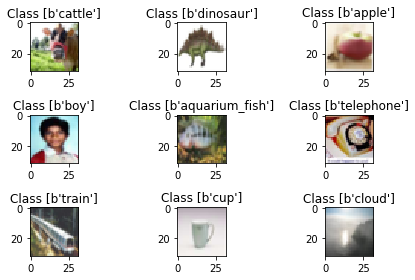

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# please download 'meta' file at https://drive.google.com/file/d/1Bwz1Oke5aRwd442zz3fAAlz6u0cmKo0E/view?usp=sharing
class_names = unpickle('meta')
class_names = np.array(class_names[b'fine_label_names'])

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], interpolation = 'none')
    plt.title("Class {}".format(class_names[y_train[i]]))
plt.tight_layout()

# normalization
X_train = X_train / 255.
X_test = X_test / 255.

y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)

print("X_train original shape {}".format(X_train.shape))
print("y_train original shape {}".format(y_train.shape))
print("X_test original shape {}".format(X_test.shape))
print("y_test original shape {}".format(y_test.shape))

# Pretrained network

In [21]:
# 'cifar100vgg_model.h5' is at https://drive.google.com/file/d/1sg_lGqM3NXL-PosqKPLxF7P4tsttIwzN/view?usp=sharing
#############################################################################
# TODO: First, load the keras model in the file 'cifar100vgg_model.h5'      #
# into model variable                                                       #
# Second, call summray function in keras model                              #
# Third, define a new model with the input of the loaded model              #
# Fourth, get the layer 'flatten_1' as the output of the new model          #
# Fifth, call summary function in the new keras model                       #
#############################################################################
# raise NotImplementedError()
model = load_model('cifar100vgg_model.h5')
for i in range(6):
  model.pop()
# model_ = Model(inputs = Input((32,32,3)), outputs = model.get_layer('flatten_1'))
model.summary()
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
__________

/usr/local/lib/python3.5/dist-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [26]:
# 'img_feature.txt' at https://drive.google.com/file/d/1G7l4VqlT7XPKYm6hfzj3OtdoHez3lu_n/view?usp=sharing
img_feature = np.loadtxt('img_feature.txt')

X_train_feature, X_test_feature = model.predict(X_train, verbose = True, batch_size = 200), model.predict(X_test, verbose = True, batch_size = 200)

print('X_train_feature shape {}'.format(X_train_feature.shape))
print('X_test feature shape {}'.format(X_test_feature.shape))

10000/10000 [==============================] - 229s 23ms/step
X_train_feature shape (50000, 512)
X_test feature shape (10000, 512)


# Nearest neighbour

In [99]:
#############################################################################
# TODO: First, calculate the 10 near neighbor with the image feature array  #
# Second, print your guess of the class of the original image               #
#############################################################################
# raise NotImplementedError()
print(img_feature.shape)
best_6_10 = np.chararray((6,10), itemsize = 15)
best_idxes = np.zeros((6, 10), dtype=int)
pool = np.concatenate([X_train_feature, X_test_feature])
pool_lab = np.concatenate([y_train, y_test])
print(pool.shape)

for i in range(6):
    tmp = np.sum((pool - img_feature[i])**2, axis=1)
    k = 10
    idx = np.argpartition(tmp, k)
    best_idxes[i] = idx[:k]
#     print(best_idxes[i])
    _ = pool_lab[idx[:k]]
    best_6_10[i] = (class_names[_])
    
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

(6, 512)
(60000, 512)


# Dimension reduction

In [119]:
#############################################################################
# TODO: First, use PCA reduce the feature to two dimensions                 #
# Second, plot the points of those 10 nearest neighbor in two dimension     #
# space                                                                     #
#############################################################################
# raise NotImplementedError()
a
for i in range(len(best_idxes)):
    if(i==0): 
        a = pool[best_idxes[0]]
        continue
    a = np.concatenate([a, pool[best_idxes[i]]])
    
pre_pca = np.concatenate([img_feature, a])
print(pre_pca.shape)
pca = PCA(n_components=2)
pca.fit(a)
print(pca.explained_variance_ratio_, pca.singular_values_)
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

(66, 512)
[0.31561074 0.23349555] [81.93974 70.47872]


In [117]:
# from sklearn.manifold import TSNE
# def plot_tsne():
#     tsne = TSNE(n_components = 2)
#     X_train_new = tsne.fit_transform(a)
#     # lda = LinearDiscriminantAnalysis(n_components = 2)
#     # X_train_new = lda.fit(X_train_feature, y_train).transform(X_train_feature)

#     colors = ['black', 'red', 'blue', 'green', 'pink', 'purple', 'cyan', 'grey', 'dodgerblue', 'gold', 
#               'silver', 'darksalmon', 'bisque', 'chartreuse', 'lightgreen', 'skyblue', 'slateblue', 'magenta', 'peachpuff', 'darkblue', 
#               'crimson']

#     for color, i, class_name in zip(colors, unique_label, unique_class_name):
#         plt.scatter(X_train_new[selected_label == i, 0], X_train_new[selected_label == i, 1], color = color, label = class_name)
    
#     plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., shadow = False, scatterpoints = 1)
#     plt.title('Real of TSNE {}'.format(file_names))
#     plt.show()
    
#     idx = 0
#     for color, i, class_name in zip(colors, ans_label, ans_class_name):
#         plt.scatter(X_train_new[idx * 10 : (idx + 1) * 10, 0], X_train_new[idx * 10 : (idx + 1) * 10, 1], color = color, label = class_name)
#         idx += 1
    
#     plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
#     plt.title('Ans of TSNE {}'.format(file_names))
#     plt.show()

# plot_tsne()